In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Модели ансамблей
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [2]:
# Загрузка датасета из KaggleHub
import kagglehub

# Скачиваем датасет
path = kagglehub.dataset_download("shrutimechlearn/churn-modelling")
print("Path to dataset files:", path)

# Читаем данные
data = pd.read_csv(f"{path}/Churn_Modelling.csv")

# Быстрый просмотр данных
data.head()

Path to dataset files: /kaggle/input/churn-modelling


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Удалим ненужные колонки
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Кодируем категориальные признаки
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

# Разделяем данные на признаки и целевую переменную
X = data.drop(columns=['Exited'])
y = data['Exited']

# Делим на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабируем числовые данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение ансамблевых моделей

## 1. Бэггинг — BaggingClassifier
- Создает множество базовых моделей (обычно деревьев решений) на разных подвыборках данных (с повторениями)
- Каждая модель обучается независимо
- Итоговый прогноз — усреднение (регрессия) или голосование (классификация)
- Уменьшает дисперсию, помогает бороться с переобучением

In [4]:
# Бэггинг с базовой моделью — решающее дерево
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)

# Предсказания и оценка
y_pred_bagging = bagging.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))

Bagging Classifier Accuracy: 0.859
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2416
           1       0.70      0.48      0.57       584

    accuracy                           0.86      3000
   macro avg       0.79      0.72      0.74      3000
weighted avg       0.85      0.86      0.85      3000



## 2. Случайный лес (Random Forest)
- Частный случай бэггинга с деревьями решений
- Добавляет случайность при выборе признаков для разделения в каждом узле дерева
- Обычно дает лучшие результаты, чем простой бэггинг
- Хорошо работает "из коробки", редко переобучается

In [5]:
# Случайный лес
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Предсказания и оценка
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8673333333333333
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



## 3. Сверхслучайные деревья (Extra Trees)

- Еще более рандомизированная версия случайного леса
- Разделения в узлах выбираются полностью случайно (без поиска оптимального)
- Быстрее обучается, чем Random Forest
- Часто показывает сравнимую точность



In [6]:
# Сверхслучайные деревья
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train, y_train)

# Предсказания и оценка
y_pred_et = extra_trees.predict(X_test)
print("Extra Trees Accuracy:", accuracy_score(y_test, y_pred_et))
print(classification_report(y_test, y_pred_et))

Extra Trees Accuracy: 0.8636666666666667
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.74      0.46      0.57       584

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



# Boosting методы

## 1. AdaBoost
- Последовательно обучает слабые модели (обычно неглубокие деревья)
- Каждая следующая модель фокусируется на ошибках предыдущих
- Присваивает больший вес "трудным" наблюдениям
- Чувствителен к выбросам

In [7]:
# AdaBoost
ada_boost = AdaBoostClassifier(random_state=42)
ada_boost.fit(X_train, y_train)

# Предсказания и оценка
y_pred_ada = ada_boost.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.8606666666666667
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.73      0.45      0.56       584

    accuracy                           0.86      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



## 2. Gradient Boosting
- Также строит ансамбль последовательно
- Каждая новая модель аппроксимирует градиент функции потерь
- Обычно дает более высокую точность, чем AdaBoost
- Более сложен в настройке, медленнее обучается

In [8]:
# Градиентный бустинг
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

# Предсказания и оценка
y_pred_gb = gradient_boosting.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.871
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2416
           1       0.77      0.48      0.59       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000



# Сравнение *результатов*

<ipython-input-9-733233717adb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=list(models.values()), palette='viridis')


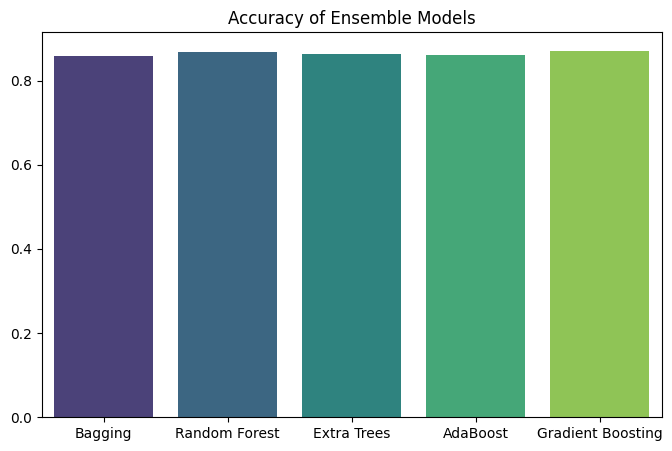

In [9]:
# Сравниваем точность моделей
models = {
    "Bagging": accuracy_score(y_test, y_pred_bagging),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Extra Trees": accuracy_score(y_test, y_pred_et),
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb)
}

# Визуализация результатов
plt.figure(figsize=(8, 5))
sns.barplot(x=list(models.keys()), y=list(models.values()), palette='viridis')
plt.title("Accuracy of Ensemble Models")
plt.show()